# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures



# Import Dataset

In [2]:
df = pd.read_csv('./feature_store/merged.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1909
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cycle_id             1906 non-null   float64
 1   start_weight         1906 non-null   float64
 2   last_weight          1906 non-null   float64
 3   average_weight       1906 non-null   float64
 4   average_adg          1906 non-null   float64
 5   fasting              1906 non-null   bool   
 6   pond_id              1906 non-null   float64
 7   measured_date        1906 non-null   object 
 8   morning_temperature  1906 non-null   float64
 9   evening_temperature  1906 non-null   float64
 10  morning_do           1906 non-null   float64
 11  evening_do           1906 non-null   float64
 12  morning_salinity     1906 non-null   float64
 13  morning_pH           1906 non-null   float64
 14  transparency         1906 non-null   float64
 15  long_cycle           1906 non-null   int64 

In [4]:
df['average_adg'].head()

0    0.270
1    0.267
2    0.281
3    0.273
4    0.256
Name: average_adg, dtype: float64

# Preprocessing

In [5]:
df = df.drop(columns=["cycle_id", "pond_id", "measured_date"], axis=1)

In [6]:
df['fasting'] = df['fasting'].replace({True: 1, False: 0})


/var/folders/zz/htmnld_148b1dbm4wj_hyrq80000gn/T/ipykernel_21321/232860989.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fasting'] = df['fasting'].replace({True: 1, False: 0})


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_weight         1906 non-null   float64
 1   last_weight          1906 non-null   float64
 2   average_weight       1906 non-null   float64
 3   average_adg          1906 non-null   float64
 4   fasting              1906 non-null   int64  
 5   morning_temperature  1906 non-null   float64
 6   evening_temperature  1906 non-null   float64
 7   morning_do           1906 non-null   float64
 8   evening_do           1906 non-null   float64
 9   morning_salinity     1906 non-null   float64
 10  morning_pH           1906 non-null   float64
 11  transparency         1906 non-null   float64
 12  long_cycle           1906 non-null   int64  
 13  total_seed           1906 non-null   float64
 14  area                 1906 non-null   float64
 15  size                 1906 non-null   float6

# Feature engineering

## Polynomial Transform

In [8]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_df = df.drop(columns=['average_adg'])
y_df = df['average_adg']

In [25]:
df.isnull().any()

start_weight           False
last_weight            False
average_weight         False
average_adg            False
fasting                False
morning_temperature    False
evening_temperature    False
morning_do             False
evening_do             False
morning_salinity       False
morning_pH             False
transparency           False
long_cycle             False
total_seed             False
area                   False
size                   False
weight                 False
num_of_harvest         False
dtype: bool

In [26]:
X_df.shape, y_df.shape

((1906, 17), (1906,))

> disini kita mendapatkan X_df sebagai X engineering dan y sebagai nilai target yang tidak kita lakukan transform

In [27]:
X_poly = poly.fit_transform(X_df)

In [28]:
features_names = poly.get_feature_names_out(X_df.columns)

In [29]:
df_poly = pd.DataFrame(X_poly, columns=features_names)

In [30]:
df_poly.head()

,start_weight,last_weight,average_weight,fasting,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,morning_pH,...,area^2,area size,area weight,area num_of_harvest,size^2,size weight,size num_of_harvest,weight^2,weight num_of_harvest,num_of_harvest^2
0,5.23,25.18,14.428,1.0,28.0,30.0,4.97,5.64,23.0,7.9,...,24681024.0,316710.000000,9.169599e+06,19872.0,4064.062500,117665.446875,255.0,3.406728e+06,7382.93,16.0
1,4.95,26.59,15.167,1.0,28.0,30.0,4.97,5.64,23.0,7.9,...,24681024.0,317952.000000,9.257918e+06,19872.0,4096.000000,119264.640000,256.0,3.472670e+06,7454.04,16.0
2,5.25,16.25,10.725,1.0,28.0,30.0,4.97,5.64,23.0,7.9,...,7290000.0,240300.000000,2.934837e+06,16200.0,7921.000000,96740.923333,534.0,1.181518e+06,6521.86,36.0
3,5.40,15.70,11.035,1.0,28.0,30.0,4.97,5.64,23.0,7.9,...,1060900.0,112476.000000,6.082232e+05,5150.0,11924.640000,64483.473600,546.0,3.486997e+05,2952.54,25.0
4,2.77,24.76,13.033,1.0,28.0,30.0,4.97,5.64,23.0,7.9,...,1562500.0,88571.428571,6.328714e+05,8750.0,5020.734694,35874.768980,496.0,2.563368e+05,3544.08,49.0


> Pada tahap ini kita sudah mendapatkan df_poly yang merupakan hasil transformasi X_df dan y_df sebagai target

In [32]:
transformed_numbers = df_poly.columns.shape
print(f"jumlah kolom df original : {df.columns.shape}")
print(f"jumlah kolom hasil transformasi adalah {transformed_numbers}")
print(df_poly.shape)

jumlah kolom df original : (18,)
jumlah kolom hasil transformasi adalah (170,)
(1906, 170)


# Feature Selection

## Mutual Information

In [33]:
target_column = 'average_adg'

In [35]:
from sklearn.feature_selection import mutual_info_regression

# Pisahkan fitur dan target
X = df_poly.copy()
y = y_df.copy()

# Menghitung mutual information
mi = mutual_info_regression(X, y)

# Membuat Series dari hasil mutual information
mi = pd.Series(mi, index=X.columns)

# Memilih fitur dengan mutual information yang signifikan (misalnya, MI > 0.1)
selected_features = mi[mi > 0.2]

# Dataset dengan fitur yang terpilih
X_selected = X[selected_features.index]


In [36]:
selected_features.shape

(36,)

### Table Mutual Infomation
<a name="tbl-mutual-information"></a>

In [37]:
mi_score_style = pd.DataFrame({'Feature': selected_features.index, 'Mutual Information': selected_features.values})
mi_score_style = mi_score_style.sort_values(by='Mutual Information', ascending=False)

mi_score_style.style.background_gradient(low=0.7, high=1.0,cmap='YlOrRd')

,Feature,Mutual Information
3,start_weight last_weight,0.320769
13,last_weight morning_pH,0.304934
6,last_weight average_weight,0.303929
21,average_weight evening_do,0.303702
14,last_weight transparency,0.301765
12,last_weight morning_salinity,0.301207
24,average_weight transparency,0.300721
23,average_weight morning_pH,0.292728
11,last_weight evening_do,0.292050
29,morning_do size,0.290634


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_selected = df_poly[selected_features.index]


# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_df.values, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.00550419552751815


In [39]:
y_pred[:10]

array([0.23283186, 0.16514736, 0.25654517, 0.28602285, 0.27543549,
       0.14981435, 0.40510718, 0.19945967, 0.30496993, 0.20316154])

In [40]:
y_test[:10]

array([0.194, 0.164, 0.284, 0.105, 0.135, 0.21 , 0.442, 0.147, 0.311,
       0.   ])

In [57]:
# combine new dataset

In [60]:
y_df

0       0.270
1       0.267
2       0.281
3       0.273
4       0.256
        ...  
1905   -0.225
1906    0.186
1907    0.196
1908    0.257
1909    0.318
Name: average_adg, Length: 1906, dtype: float64

In [61]:
df_mutual_information = X_selected.reset_index(drop=True).copy()
df_mutual_information['average_adg'] = y_df.reset_index(drop=True).copy()

In [65]:
df_mutual_information.to_csv('./feature_store/polynomial-features.csv')

## Pearson Correlation

In [24]:
correlation = df_poly.corrwith(y_df)

In [25]:
selected_features = correlation[abs(correlation) > 0.1].index

In [26]:
selected_features

Index(['last_weight', 'average_weight', 'last_weight^2', 'last_weight fasting',
       'last_weight morning_temperature', 'last_weight evening_temperature',
       'last_weight morning_do', 'last_weight evening_do',
       'last_weight morning_salinity', 'last_weight morning_pH',
       'last_weight transparency', 'last_weight long_cycle',
       'average_weight fasting', 'average_weight morning_temperature',
       'average_weight evening_temperature', 'average_weight morning_do',
       'average_weight evening_do', 'average_weight morning_salinity',
       'average_weight morning_pH', 'average_weight transparency',
       'average_weight long_cycle'],
      dtype='object')

In [28]:
pearson_score_style = pd.DataFrame({'Feature': correlation[selected_features].index, 'PearsonCorrelation': abs(correlation[selected_features].values)})
pearson_score_style = pearson_score_style.sort_values(by='PearsonCorrelation', ascending=False)

pearson_score_style.style.background_gradient(low=0.7, high=1.0,cmap='YlOrRd')

,Feature,PearsonCorrelation
7,last_weight evening_do,0.147742
9,last_weight morning_pH,0.147444
0,last_weight,0.147006
6,last_weight morning_do,0.146665
5,last_weight evening_temperature,0.145695
4,last_weight morning_temperature,0.144855
10,last_weight transparency,0.144645
8,last_weight morning_salinity,0.134437
3,last_weight fasting,0.123797
16,average_weight evening_do,0.122034


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_selected = df_poly[selected_features]


# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_df, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.005893299399844495


In [30]:
y_test[:10].values, y_pred[:10]

(array([0.194, 0.164, 0.284, 0.105, 0.135, 0.21 , 0.442, 0.147, 0.311,
        0.   ]),
 array([0.21579836, 0.16499981, 0.24595385, 0.28299461, 0.27188107,
        0.14211578, 0.4188765 , 0.18042445, 0.31980226, 0.1747718 ]))

In [32]:
df_pearson_corr = X_selected.copy()
df_pearson_corr['average_adg'] = y_df

In [33]:
df_pearson_corr.to_csv('./feature_store/pearson-features.csv')

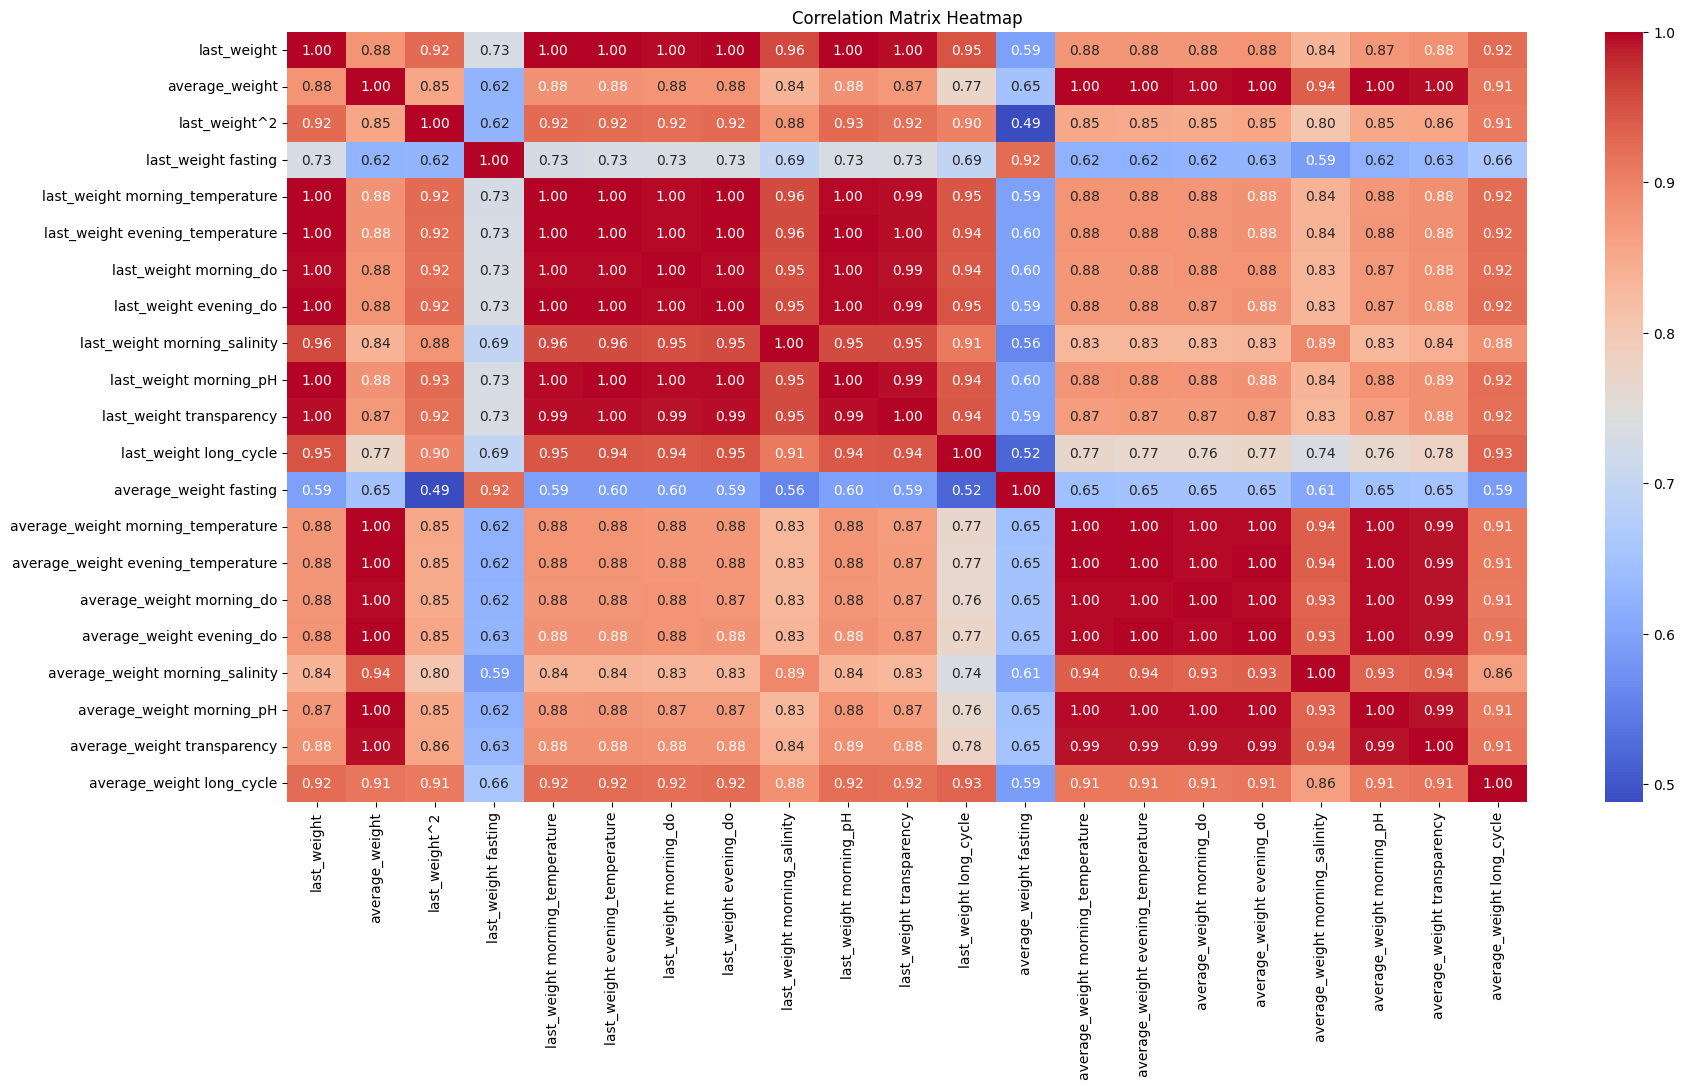

In [31]:
plt.figure(figsize=(20, 10))
correlation_matrix = X_selected.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Conclusion
---

1. Fitur yang didapatkan
- Mutual information menghasilkan nilai `mi` [table mutual information](#tbl-mutual-information)
- Angka Mutual Information (MI) dalam tabel tersebut mewakili seberapa banyak informasi yang dimiliki oleh setiap fitur tentang target variabel
- Target variable menggunakan fitur `average_adg`
- Fitur-fitur yang paling informatif: `[average_weight, last_weight, start_weight, size, long_cycle]`. Fitur-fitur ini mungkin sangat penting untuk model prediksi Anda dan sebaiknya diprioritaskan dalam pemilihan fitur.
- Fitur dengan kontribusi informasi rendah: Fitur-fitur seperti fasting yang memiliki nilai Mutual Information sangat rendah atau nol mungkin tidak relevan dan bisa dipertimbangkan untuk diabaikan dalam model prediksi.
- Kami menggunakan 5 fitur terbaik.


3. Identifikasi fitur baru dari 5 fitur terbaik
- Pada proses mutual information menggunakan `transformasi matematika`
- Proses transform menggunakan proses perkalian antar fitur terpilih dan fitur itu sendiri.
- kemudian akan menghasilkan fitur baru seperti pada [chart](#chrt-math-transform)

github : https://github.com/sugengdcahyo/shrimp-prediction/blob/main/02-Filter%20Based%20Feature%20Selection.ipynb

## Kelompok 3:
- Dimas Firmansyah (23/528900/PPA/06692)
- MUHAMMAD AKBAR HAMID (23/530003/PPA/06706)
- Sugeng Dwi Cahyono (23/531008/PPA/06757)

